<a href="https://colab.research.google.com/github/lariskelmer/master-s-degree/blob/main/Vis%C3%A3o%20Computacional/CV02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Imagens 

## Regressão Logística


Base: Labeled Faces in the Wild (LFW)

In [ ]:
# importar os pacotes necessários
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import imutils
import cv2
import sklearn
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
# adquirir um pequeno subconjunto da base Labeled Faces in the Wild 
print("[INFO] obtendo dados...")
dataset = datasets.fetch_lfw_people(min_faces_per_person=70, funneled=True, resize=0.5)

In [ ]:
# construir  o conjunto de treinamento e teste.
(trainData, testData, trainLabels, testLabels) = train_test_split(dataset.data, dataset.target,
	test_size=0.25, random_state=42)

## Treinar o classificador

In [ ]:
# treinar o modelo e exibir o relatório de classificação
print("[INFO] treinando modelo...")
model = LogisticRegression()
model.fit(trainData, trainLabels)
print(classification_report(testLabels, model.predict(testData),
	target_names=dataset.target_names))

[INFO] treinando modelo...
                   precision    recall  f1-score   support

     Ariel Sharon       0.47      0.54      0.50        13
     Colin Powell       0.87      0.87      0.87        60
  Donald Rumsfeld       0.61      0.63      0.62        27
    George W Bush       0.91      0.88      0.90       146
Gerhard Schroeder       0.63      0.76      0.69        25
      Hugo Chavez       0.64      0.47      0.54        15
       Tony Blair       0.76      0.81      0.78        36

         accuracy                           0.80       322
        macro avg       0.70      0.71      0.70       322
     weighted avg       0.81      0.80      0.81       322



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Testando classificador manualmente

[PREDIÇÃO] predito: George W Bush, real: George W Bush


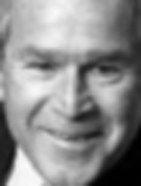

[PREDIÇÃO] predito: George W Bush, real: George W Bush


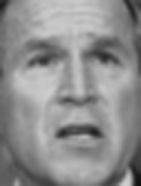

[PREDIÇÃO] predito: Colin Powell, real: Colin Powell


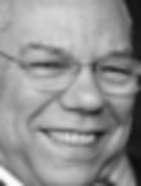

[PREDIÇÃO] predito: George W Bush, real: Colin Powell


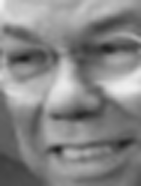

[PREDIÇÃO] predito: Colin Powell, real: Colin Powell


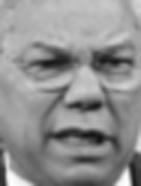

[PREDIÇÃO] predito: George W Bush, real: George W Bush


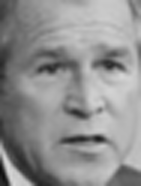

[PREDIÇÃO] predito: George W Bush, real: George W Bush


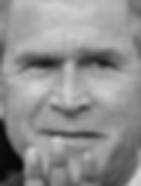

[PREDIÇÃO] predito: George W Bush, real: George W Bush


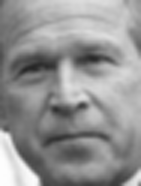

[PREDIÇÃO] predito: George W Bush, real: George W Bush


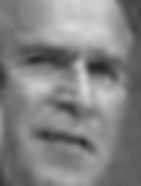

[PREDIÇÃO] predito: George W Bush, real: George W Bush


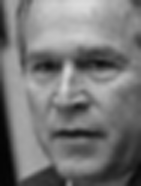

In [ ]:
# loop em algumas imagens aleatórias
for i in list(map(int, np.random.randint(0, high=testLabels.shape[0], size=(10,)))):
	# pega a imagem e o nome
	image = testData[i].reshape((62, 47))
	name = dataset.target_names[testLabels[i]]

  # redimensiona para uma melhor visualização
	image = imutils.resize(image.astype("uint8"), width=image.shape[1] * 3, inter=cv2.INTER_CUBIC)
	
  # classifica a imagem utilizando o modelo treinado
	prediction = model.predict(testData[i].reshape(1, -1))[0]
	prediction = dataset.target_names[prediction]
	print("[PREDIÇÃO] predito: {}, real: {}".format(prediction, name))
	cv2_imshow(image)

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# gerar os dados XOR
tl = np.random.uniform(size=(100, 2)) + np.array([-2.0, 2.0])
tr = np.random.uniform(size=(100, 2)) + np.array([2.0, 2.0])
br = np.random.uniform(size=(100, 2)) + np.array([2.0, -2.0])
bl = np.random.uniform(size=(100, 2)) + np.array([-2.0, -2.0])
X = np.vstack([tl, tr, br, bl])
y = np.hstack([[1] * len(tl), [-1] * len(tr), [1] * len(br), [-1] * len(bl)])

# construir os conjunto de treinamento e teste
(trainData, testData, trainLabels, testLabels) = train_test_split(X, y, test_size=0.25,
	random_state=42)

## Kernel Linear

In [ ]:
# treinar usando o SVM com kernel linear
print("[RESULTADOS] SVM com kernel linear")
model = SVC(kernel="linear")
model.fit(trainData, trainLabels)

# avaliar os resultados
print(classification_report(testLabels, model.predict(testData)))

[RESULTADOS] SVM com kernel linear
              precision    recall  f1-score   support

          -1       0.59      1.00      0.74        44
           1       1.00      0.45      0.62        56

    accuracy                           0.69       100
   macro avg       0.79      0.72      0.68       100
weighted avg       0.82      0.69      0.67       100



## Kernel Polinomial

In [ ]:
# treinar SVM usando kernel polinomial
print("[RESULTADOS] SVM com kernel polinomial.")
model = SVC(kernel="poly", degree=2, coef0=1)
model.fit(trainData, trainLabels)

# exibindo os resultados
print(classification_report(testLabels, model.predict(testData)))

[RESULTADOS] SVM com kernel polinomial.
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        56

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# Árvores de Decisão



In [ ]:
!pip install mahotas

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import mahotas
import os

def describe(image):
	# extrai a média e desvio padrão de cada canal do espaço HSV.
	(means, stds) = cv2.meanStdDev(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))
	colorStats = np.concatenate([means, stds]).flatten()
  # extrai Haralick texture features
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	haralick = mahotas.features.haralick(gray).mean(axis=0)
  # retorna um vetor formado por estatísticas básicas e das Haralick texture features
	return np.hstack([colorStats, haralick])

## Construindo Conjunto de Dados

In [ ]:
imagesPath = './4scenes'
labels = []
data = []

files = os.listdir(imagesPath)

print("[INFO] extraindo features...")

# loop em todas as imagens do diretório
for image_name in files:
  # extraindo o rótulo das imagens (primeira parte do nome do arquivo)
  label = image_name[image_name.rfind("/") + 1:].split("_")[0]
  # carregando a imagem
  image = cv2.imread(imagesPath+'/'+image_name)  
  # extraindo as features da imagem
  features = describe(image)
  # adicionando o rótulo da imagem (classe) em uma lista de rótulos
  labels.append(label)
  # adicionando a imagem (features) ao conjunto de dados
  data.append(features)

[INFO] extraindo features...


## Dividir a base de dados

In [ ]:
# construir as bases de treinamento e teste
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data),
	np.array(labels), test_size=0.25, random_state=42)

# Treinar modelo

In [ ]:
# iniciar o modelo como árvore de decisão
model = DecisionTreeClassifier(random_state=84)
# treinar o modelo
print("[INFO] treinando modelo...")
model.fit(trainData, trainLabels)

[INFO] treinando modelo...


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=84, splitter='best')

## Avaliar modelo

In [ ]:
print("[INFO] avaliando...")
predictions = model.predict(testData)
print(classification_report(testLabels, predictions))

[INFO] avaliando...
              precision    recall  f1-score   support

       coast       0.74      0.76      0.75        84
      forest       0.92      0.88      0.90        88
     highway       0.63      0.62      0.62        60
      street       0.76      0.78      0.77        78

    accuracy                           0.77       310
   macro avg       0.76      0.76      0.76       310
weighted avg       0.77      0.77      0.77       310



## Testando manualmente o modelo

In [ ]:
imagesPath = './4scenes'
labels = []
data = []

files = os.listdir(imagesPath)

print("[INFO] extraindo features...")

# loop em todas as imagens do diretório
for image_name in files:
  # extraindo o rótulo das imagens (primeira parte do nome do arquivo)
  label = image_name[image_name.rfind("/") + 1:].split("_")[0]
  # carregando a imagem
  image = cv2.imread(imagesPath+'/'+image_name)  
  # extraindo as features da imagem
  features = describe(image)
  # adicionando o rótulo da imagem (classe) em uma lista de rótulos
  labels.append(label)
  # adicionando a imagem (features) ao conjunto de dados
  data.append(features)

[PREDIÇÃO] coast_n739046.jpg: coast


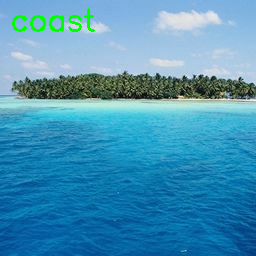

[PREDIÇÃO] street_boston46.jpg: street


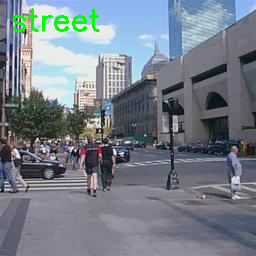

[PREDIÇÃO] coast_nat899.jpg: coast


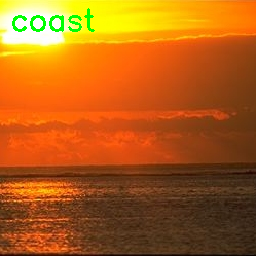

[PREDIÇÃO] coast_nat905.jpg: coast


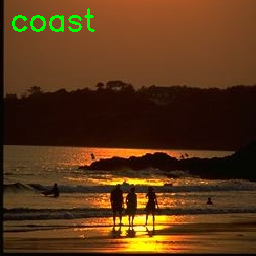

[PREDIÇÃO] coast_sun31.jpg: coast


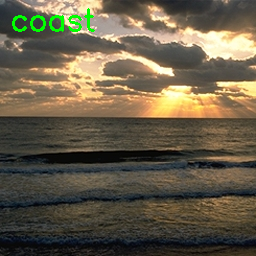

[PREDIÇÃO] coast_sun28.jpg: coast


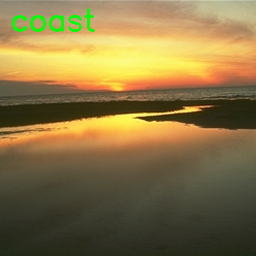

[PREDIÇÃO] forest_for79.jpg: forest


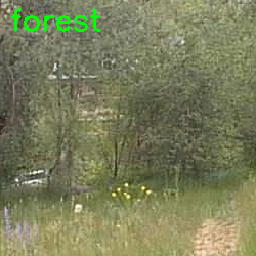

[PREDIÇÃO] forest_natu866.jpg: forest


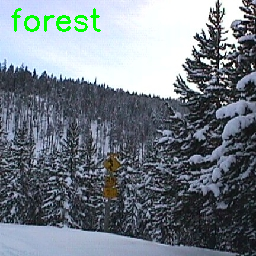

[PREDIÇÃO] street_urb521.jpg: street


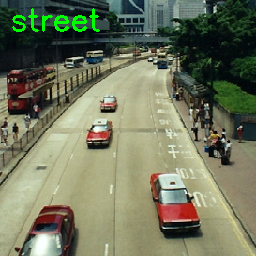

[PREDIÇÃO] highway_gre462.jpg: highway


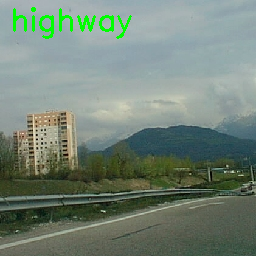

In [ ]:
j# loop em algumas imagens aleatórias
for i in np.random.randint(0, high=len(files), size=(10,)):
	# pega a imagem e classifica
	imagePath = imagesPath + '/' + files[i]
	filename = files[i]
	image = cv2.imread(imagePath)
	features = describe(image)
	prediction = model.predict(features.reshape(1, -1))[0]
	# mostra a predição
	print("[PREDIÇÃO] {}: {}".format(filename, prediction))
	cv2.putText(image, prediction, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
	cv2_imshow(image)